In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [54]:
#Reading data
data = pd.read_excel("C:/Users/mohammad/Downloads/GRB_Final_Document.xlsx")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   GRB                         368 non-null    object 
 1   BAT RA (J2000)              368 non-null    float64
 2   BAT Dec (J2000)             368 non-null    float64
 3   XRT Spectral Index (Gamma)  368 non-null    float64
 4   XRT Column Density (NH)     368 non-null    float64
 5   BAT Fluence                 368 non-null    float64
 6   BAT T90                     368 non-null    float64
 7   Redshift                    368 non-null    float64
dtypes: float64(7), object(1)
memory usage: 23.1+ KB


In [55]:
df = data.iloc[:, 3:8]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   XRT Spectral Index (Gamma)  368 non-null    float64
 1   XRT Column Density (NH)     368 non-null    float64
 2   BAT Fluence                 368 non-null    float64
 3   BAT T90                     368 non-null    float64
 4   Redshift                    368 non-null    float64
dtypes: float64(5)
memory usage: 14.5 KB


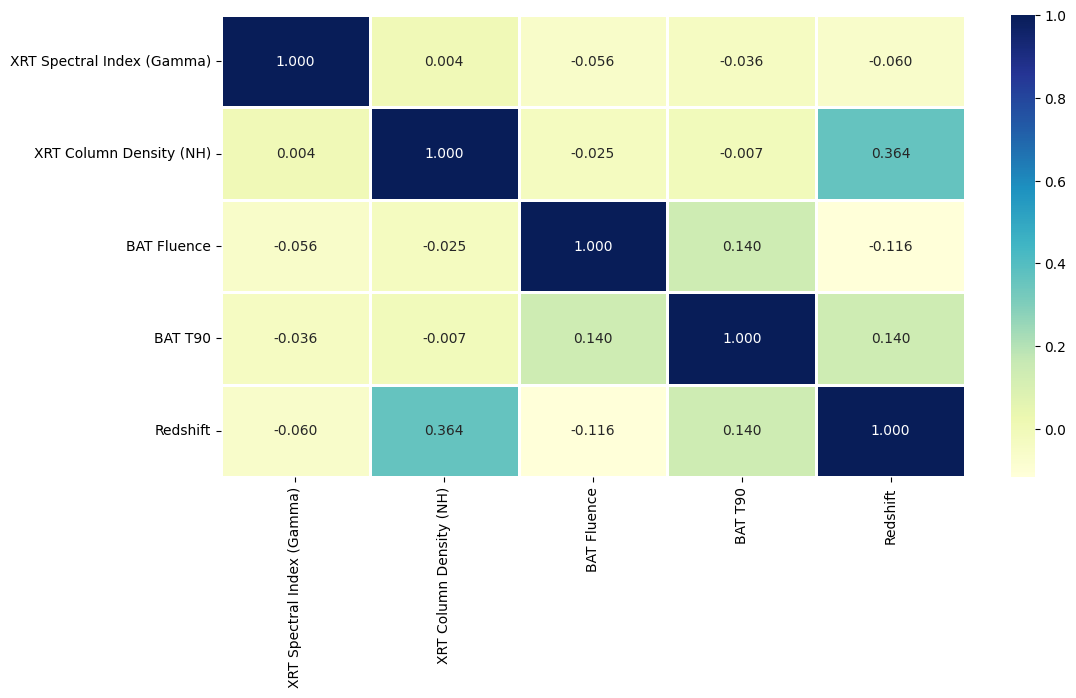

In [4]:
plt.figure(figsize=(12,6))

sns.heatmap(df.corr(),annot=True,cmap='YlGnBu',fmt='.3f',linewidths=2)
plt.show()


In [ ]:
sns.pairplot(data=df ,hue="Redshift" )

In [56]:
X= df.iloc[:, 0:4]
y= df.iloc[:,-1]

In [57]:
x_train, x_test , y_train , y_test = train_test_split(X, y, test_size=0.3, random_state=42)
x_test , x_validation , y_test , y_validation = train_test_split(x_test , y_test , test_size = 0.2 , random_state= 42)
np.random.seed(18)

In [58]:
pca = PCA(n_components=4)  # تعداد مولفه‌ها به تعداد مورد نیاز تغییر دهید
X_train_pca = pca.fit_transform(x_train)
X_test_pca = pca.transform(x_test)

In [59]:

model = XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10, random_state=42)

In [60]:
param_grid = {
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2]
}

In [21]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(alpha=10, base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.3,
                                    device=None, early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rat...
                                    max_depth=5, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=10,
                                    n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [0, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'reg_alpha': [0, 0.1, 0.5], 'reg_lambda': [1, 1.5, 2],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error')

In [61]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 1.0}


In [62]:
best_model = XGBRegressor(objective='reg:squarederror', **best_params)
best_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [63]:
y_pred_train = best_model.predict(x_train)
y_pred = best_model.predict(x_test)

In [64]:
from sklearn.model_selection import train_test_split, cross_val_score
cv_scores = cross_val_score(best_model, x_train, y_train, cv=10)
print('Cross-validation scores:', cv_scores)


Cross-validation scores: [-0.06319866 -0.23783953  0.32064866 -0.0332387  -0.59320126  0.13275081
 -0.18606094 -0.26531183 -0.17947066  0.19210727]


In [65]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

best_model.fit(x_train, y_train)
y_pred_train = best_model.predict(x_train)
r2_train = r2_score(y_train, y_pred_train)

print("R^2 train Score:", r2_train)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R^2 test Score:", r2_test)


R^2 train Score: 0.8732282395143328
Mean Squared Error: 1.80842614739938
Root Mean Squared Error: 1.3447773597883703
Mean Absolute Error: 1.0727513204027306
R^2 test Score: 0.032801086261642576
